In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi

truthTable = [
    '000',
    '001',
    '010',
    '011',
    '100',
    '101',
    '110',
    '111'
]

print('dch -> dch -> dch -> dch -> dch -> dch -> dch')

for vec in truthTable:
    qreg_q = QuantumRegister(3,'q')
    creg_c = ClassicalRegister(3+3+3+3+3+3, 'c')
    maxD = QuantumCircuit(qreg_q, creg_c, name='maxD')

    for i, val in enumerate(vec):
        state_vec = [1-int(val) , int(val)] 
        maxD.initialize(state_vec, i)

    maxD.measure([0,1,2], [0,1,2])

    maxD.barrier()
    maxD.x(qreg_q[2])
    maxD.barrier()
    
    maxD.measure([0,1,2], [3,4,5])
    
    maxD.barrier()
    maxD.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
    maxD.barrier()
    
    maxD.measure([0,1,2], [6,7,8])
    
    maxD.barrier()
    maxD.x(qreg_q[2])
    maxD.barrier()
    
    maxD.measure([0,1,2], [9,10,11])
    
    maxD.barrier()
    maxD.cx(qreg_q[0], qreg_q[1])
    maxD.barrier()
    
    maxD.measure([0,1,2], [12,13,14])
    
    maxD.barrier()
    maxD.cx(qreg_q[0], qreg_q[2])
    maxD.barrier()
    
    maxD.measure([0,1,2], [15,16,17])
    
    simulator = Aer.get_backend('qasm_simulator')
    res = execute(maxD, backend=simulator, shots=1).result()
    counts = res.get_counts()
    mes = list(counts.keys()).pop()
    mes1 = ''.join(list(reversed(mes))[0:3])
    mes2 = ''.join(list(reversed(mes))[3:6])
    mes3 = ''.join(list(reversed(mes))[6:9])
    mes4 = ''.join(list(reversed(mes))[9:12])
    mes5 = ''.join(list(reversed(mes))[12:15])
    mes6 = ''.join(list(reversed(mes))[15:18])
    print(
        '{} -> {} -> {} -> {} -> {} -> {} -> {}'.format(
            vec, mes1, mes2, mes3,mes4, mes5, mes6
    ))
    
    maxD.draw()



dch -> dch -> dch -> dch -> dch -> dch -> dch
000 -> 000 -> 001 -> 001 -> 000 -> 000 -> 000
001 -> 001 -> 000 -> 000 -> 001 -> 001 -> 001
010 -> 010 -> 011 -> 111 -> 110 -> 100 -> 101
011 -> 011 -> 010 -> 010 -> 011 -> 011 -> 011
100 -> 100 -> 101 -> 101 -> 100 -> 110 -> 111
101 -> 101 -> 100 -> 100 -> 101 -> 111 -> 110
110 -> 110 -> 111 -> 011 -> 010 -> 010 -> 010
111 -> 111 -> 110 -> 110 -> 111 -> 101 -> 100


In [10]:
maxD.draw()

┌─────────────────┐┌─┐       ░       ░ ┌─┐       ░ ┌───┐ ░ ┌─┐       ░ »
 q_0: ┤ initialize(0,1) ├┤M├───────░───────░─┤M├───────░─┤ X ├─░─┤M├───────░─»
      ├─────────────────┤└╥┘┌─┐    ░       ░ └╥┘┌─┐    ░ └─┬─┘ ░ └╥┘┌─┐    ░ »
 q_1: ┤ initialize(0,1) ├─╫─┤M├────░───────░──╫─┤M├────░───■───░──╫─┤M├────░─»
      ├─────────────────┤ ║ └╥┘┌─┐ ░ ┌───┐ ░  ║ └╥┘┌─┐ ░   │   ░  ║ └╥┘┌─┐ ░ »
 q_2: ┤ initialize(0,1) ├─╫──╫─┤M├─░─┤ X ├─░──╫──╫─┤M├─░───■───░──╫──╫─┤M├─░─»
      └─────────────────┘ ║  ║ └╥┘ ░ └───┘ ░  ║  ║ └╥┘ ░       ░  ║  ║ └╥┘ ░ »
c: 18/════════════════════╩══╩══╩═════════════╩══╩══╩═════════════╩══╩══╩════»
                          0  1  2             3  4  5             6  7  8    »
«            ░ ┌─┐       ░       ░ ┌─┐       ░       ░ ┌─┐      
« q_0: ──────░─┤M├───────░───■───░─┤M├───────░───■───░─┤M├──────
«            ░ └╥┘┌─┐    ░ ┌─┴─┐ ░ └╥┘┌─┐    ░   │   ░ └╥┘┌─┐   
« q_1: ──────░──╫─┤M├────░─┤ X ├─░──╫─┤M├────░───┼───░──╫─┤M├───
«      ┌───┐ ░  ║ └╥┘┌─┐ ░ └───┘ ░  ║ └╥┘┌─┐ ░ ┌─┴─┐ ░  ║ └╥┘┌─┐
« q_2: ┤ X ├─░──╫──╫─┤M├─░───────░──╫──╫─┤M├─░─┤ X ├─░──╫──╫─┤M├
«      └───┘ ░  ║  ║ └╥┘ ░       ░  ║  ║ └╥┘ ░ └───┘ ░  ║  ║ └╥┘
«c: 18/═════════╩══╩══╩═════════════╩══╩══╩═════════════╩══╩══╩═
«               9  10 11            12 13 14            15 16 17

In [11]:
# Build Toffolli gate
qreg_q = QuantumRegister(3,'q')
maxD = QuantumCircuit(qreg_q, name='maxD')

maxD.x(qreg_q[2])
maxD.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
maxD.x(qreg_q[2])
maxD.cx(qreg_q[0], qreg_q[1])
maxD.cx(qreg_q[0], qreg_q[2])

maxD.to_gate()

maxD.draw()

┌───┐          
q_0: ─────┤ X ├──■────■──
          └─┬─┘┌─┴─┐  │  
q_1: ───────■──┤ X ├──┼──
     ┌───┐  │  ├───┤┌─┴─┐
q_2: ┤ X ├──■──┤ X ├┤ X ├
     └───┘     └───┘└───┘

In [12]:
def testCircinit(vec):
    """
    Init input and measurments to maxD accourding to vec
    Such that the circuit can be tested. 
    """
    circ = QuantumCircuit(3,3)

    for i, val in enumerate(vec):
            state_vec = [1-int(val) , int(val)] 
            circ.initialize(state_vec, i)

    circ.append(maxD, [0,1,2])
    circ.measure([0,1,2], [0,1,2])
    return circ



In [13]:
# maxD sanity tests

simulator = Aer.get_backend('qasm_simulator')

truthTable = {
    '000': '000',
    '001': '001',
    '010': '101',
    '011': '011',
    '100': '111',
    '101': '110',
    '110': '010',
    '111': '100'
}

for state in truthTable:
    circ = testCircinit(state)
    res = execute(circ, backend=simulator, shots=1).result()
    counts = res.get_counts()
    output = list(counts.keys()).pop()
    assert ''.join(reversed(output)) == truthTable[state]



In [14]:
# Quantum maxD circuit
circ = QuantumCircuit(3,3)

for i, _ in enumerate(vec):
        circ.h(i)

circ.append(maxD, [0,1,2])
circ.measure([0,1,2], [0,1,2])

res = execute(circ, backend=simulator, shots=3000).result()
counts = res.get_counts()
print(counts)

circ.draw()

{'000': 385, '001': 385, '010': 422, '011': 397, '100': 345, '101': 345, '110': 351, '111': 370}


┌───┐┌───────┐┌─┐      
q_0: ┤ H ├┤0      ├┤M├──────
     ├───┤│       │└╥┘┌─┐   
q_1: ┤ H ├┤1 maxD ├─╫─┤M├───
     ├───┤│       │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2      ├─╫──╫─┤M├
     └───┘└───────┘ ║  ║ └╥┘
c: 3/═══════════════╩══╩══╩═
                    0  1  2

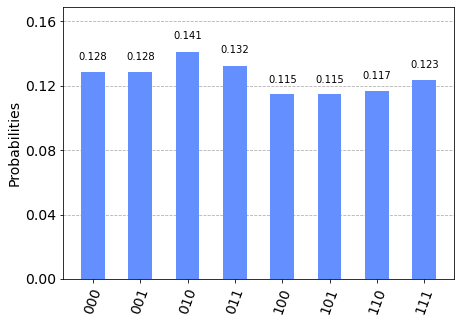

In [15]:
from qiskit.visualization import plot_histogram
%matplotlib inline

plot_histogram(counts)


In [1]:
# Init connection
from qiskit import IBMQ
IBMQ.load_account()

/miniconda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
provider = IBMQ.get_provider(hub = 'ibm-q')
qcomp = provider.get_backend('ibmq_lima')

In [4]:
import qiskit.tools.jupyter
%qiskit_job_watcher
from qiskit.tools.monitor import job_monitor
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run
[[9.78515625e-01 3.51562500e-02 7.81250000e-02 9.76562500e-04
  9.57031250e-02 2.92968750e-03 8.78906250e-03 0.00000000e+00]
 [5.85937500e-03 9.58007812e-01 0.00000000e+00 7.32421875e-02
  9.76562500e-04 9.08203125e-02 0.00000000e+00 4.88281250e-03]
 [7.81250000e-03 0.00000000e+00 9.15039062e-01 2.24609375e-02
  0.00000000e+00 0.00000000e+00 9.27734375e-02 9.76562500e-04]
 [0.00000000e+00 2.92968750e-03 3.90625000e-03 8.98437500e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.30078125e-02]
 [7.81250000e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.88671875e-01 1.56250000e-02 7.22656250e-02 2.92968750e-03]
 [0.00000000e+00 3.90625000e-03 0.00000000e+00 9.76562500e-04
  8.78906250e-03 8.87695312e-01 0.00000000e+00 5.66406250e-02]
 [0.00000000e+00 0.00000000e+00 2.92968750e-03 0.00000000e+00
  5.85937500e-03 0.00000000e+00 8.16406250e-01 2.63671875e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.90625000e-03
  0.00000000e+00 2.9296875

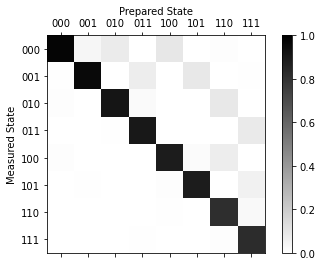

In [7]:
# Create measurment Filter

qr = QuantumRegister(3)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr)

job = execute(meas_calibs, backend=qcomp, shots = 1024, optimization_level=0)
job_monitor(job)

meas_fitter = CompleteMeasFitter(job.result(), state_labels)
print(meas_fitter.cal_matrix)
meas_fitter.plot_calibration()
mf = meas_fitter.filter

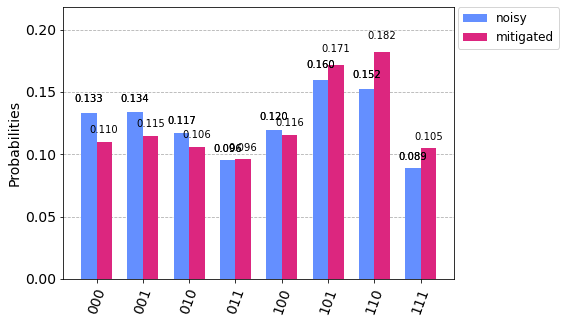

In [16]:
# Run circ on IBMQ

job = execute(circ, backend=qcomp, shots=3000)
circ_res = job.result()

# device_counts = circ_res.get_counts(circ)

device_counts = circ_res.get_counts(circ)
mitigated_results = mf.apply(circ_res)
mitigated_counts = mitigated_results.get_counts(circ)

plot_histogram([device_counts, mitigated_counts], legend=['noisy', 'mitigated'])